In [1]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline


Using TensorFlow backend.


In [9]:
train_path = 'C://Users//parkkev//deep-learning-keras-tensorflow-master//data//bs-and-is//train'
valid_path = 'C://Users//parkkev//deep-learning-keras-tensorflow-master//data//bs-and-is//valid'
test_path = 'C://Users//parkkev//deep-learning-keras-tensorflow-master//data//bs-and-is//test'

#from os import listdir
#from os.path import isfile, join
#onlyfiles = [f for f in listdir(train_path) if isfile(join(train_path, f))]

#print(onlyfiles)


In [10]:
train_batches = ImageDataGenerator().flow_from_directory(train_path,target_size=(224,224),classes=['BalanceSheet','IncomeStatement','None'],batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path,target_size=(224,224),classes=['BalanceSheet','IncomeStatement','None'],batch_size=5)
test_batches = ImageDataGenerator().flow_from_directory(test_path,target_size=(224,224),classes=['BalanceSheet','IncomeStatement','None'],batch_size=10)


Found 300 images belonging to 3 classes.
Found 90 images belonging to 3 classes.
Found 3 images belonging to 3 classes.


In [11]:
def plots(ims, figsize=None, rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if(ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure()
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows,cols,i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(title[i],fontsize=10)
        plt.imshow(ims[i],interpolation=None if interp else 'none')    

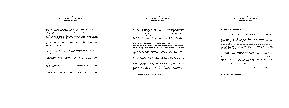

In [12]:
imgs,labels = next(test_batches)

plots(imgs,labels)


In [6]:
model = Sequential([
         Conv2D(32,(3,3), activation='relu',input_shape=(224,224,3)),
         Flatten(),
         Dense(3,activation='softmax'),
        ])

In [7]:
model.compile(Adam(lr=.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [8]:
model.fit_generator(train_batches, steps_per_epoch=30,
                    validation_data=valid_batches, validation_steps=18,epochs=5,verbose=2)

Epoch 1/5
 - 47s - loss: 10.4442 - acc: 0.3500 - val_loss: 10.7454 - val_acc: 0.3333
Epoch 2/5
 - 42s - loss: 10.7454 - acc: 0.3333 - val_loss: 10.7454 - val_acc: 0.3333
Epoch 3/5
 - 39s - loss: 10.7454 - acc: 0.3333 - val_loss: 10.7454 - val_acc: 0.3333
Epoch 4/5
 - 39s - loss: 10.7454 - acc: 0.3333 - val_loss: 10.7454 - val_acc: 0.3333
Epoch 5/5
 - 39s - loss: 10.7454 - acc: 0.3333 - val_loss: 10.7454 - val_acc: 0.3333


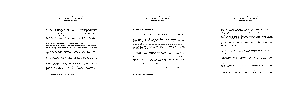

In [9]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs,test_labels)

In [10]:
print(test_labels)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [11]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [12]:
print(predictions)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [2]:
#vgg16_model = keras.applications.vgg16.VGG16()
#from keras.applications.vgg16 import VGG16
#from vgg16 import VGG16
#vgg16_model = VGG16(weights = 'imagenet', include_top = False)

Exception: URL fetch failure on https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg16_weights_tf_dim_ordering_tf_kernels.h5: None -- [WinError 10054] An existing connection was forcibly closed by the remote host

In [2]:
from keras.applications.vgg16 import VGG16
vgg_model = VGG16()


In [3]:
vgg_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [5]:
type(vgg_model)

keras.engine.training.Model

In [6]:
model = Sequential()
for layer in vgg_model.layers[:-1]: 
    model.add(layer)

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [94]:
for layer in model.layers:
    layer.trainable = False

In [95]:
model.add(Dense(3,activation='softmax'))

In [96]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [97]:
model.compile(Adam(lr=.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [98]:
model.fit_generator(train_batches, steps_per_epoch=5,
                    validation_data=valid_batches, validation_steps=18,epochs=100,verbose=2)

Epoch 1/5
 - 183s - loss: 1.5235 - acc: 0.2733 - val_loss: 1.5409 - val_acc: 0.2333
Epoch 2/5
 - 182s - loss: 1.0570 - acc: 0.5033 - val_loss: 1.2508 - val_acc: 0.4333
Epoch 3/5
 - 162s - loss: 0.8598 - acc: 0.6300 - val_loss: 1.1452 - val_acc: 0.4444
Epoch 4/5
 - 159s - loss: 0.7415 - acc: 0.7100 - val_loss: 1.0390 - val_acc: 0.4778
Epoch 5/5
 - 161s - loss: 0.6622 - acc: 0.7500 - val_loss: 0.9951 - val_acc: 0.5667


In [133]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [134]:
print(test_labels)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [135]:
print(predictions)

[[0.04734807 0.06300034 0.88965166]
 [0.07020752 0.03624709 0.89354545]
 [0.041288   0.05407701 0.904635  ]]
